<a href="https://colab.research.google.com/github/shubhamcoder260/ml_projects/blob/main/rain_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split as tts
import numpy as np

In [ ]:
raw_df=pd.read_csv('weatherAUS.csv')

In [ ]:
raw_df
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**`dropna-- deletes the data where there are null values from selected columns`**

In [ ]:
raw_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

**Exploratory Data Analysis and Visualization**

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'


In [ ]:
px.histogram(raw_df,
             x='Location',
             title='Location vs Rainy Days',
             color='RainToday')

In [ ]:
temp3pm=px.histogram(raw_df,
             x='Temp3pm',
             title='Temperature vs Rain Tomorrow',
             color='RainTomorrow')
temp3pm.show()
temp9am=px.histogram(raw_df,
             x='Temp9am',
             title='Temperature vs Rain Tomorrow',
             color='RainTomorrow')
temp9am.show()
rain=px.histogram(raw_df,
                  x='RainTomorrow',
                  title='RainToday vs RainTomorrow',
                  color='RainToday')
rain.show()
temp=px.scatter(raw_df.sample(2000),
           title='Min Temp vs Max Temp',
           x='MinTemp',
           y='MaxTemp',
           color='RainToday')
temp.show()
temp3pm_humid3pm=px.scatter(raw_df.sample(2000),
           title='temp3pm vs humidity3pm',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')
temp3pm_humid3pm.show()
WindSp_3pm_Press3pm=px.scatter(raw_df.sample(2000),
           title='WindSpeed3pm vs Pressure3pm',
           x='Temp3pm',
           y='WindSpeed3pm',
           color='RainToday')
WindSp_3pm_Press3pm.show()


In [ ]:
use_sample=False
sample_fraction=0.1
if use_sample:
  raw_df=raw_df.sample(frac=sample_fraction).copy()


**Training,Validation and Test Sets**

**training_set**-- used to train the model i.e.,compute the loss and adjust the model's weight using an optimization techique

**validation set**-- used to evaluate the model during training ,tune model hyperparapeters and pick the best version of the model

**test set**-- used to compare different models or approaches and report the model's final accuracy

In [ ]:
# train_val_df,test_df=tts(raw_df,test_size=0.2,random_state=42)
# train_df,val_df=tts(train_val_df,test_size=0.25,random_state=42)

In [ ]:
year=pd.to_datetime(raw_df.Date).dt.year
train_df=raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]

In [ ]:
print('train_df.shape:',train_df.shape)
print('val_df.shape:',val_df.shape)
print('test_df.shape:',test_df.shape)

train_df.shape: (97988, 23)
val_df.shape: (17089, 23)
test_df.shape: (25710, 23)


In [ ]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0          NaN   
2134    2015-01-02   Albury     15.5     39.6       0.0          NaN   
2135    2015-01-03   Albury     17.1     38.3       0.0          NaN   
2136    2015-01-04   Albury     26.0     33.1       0.0          NaN   
2137    2015-01-05   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0          NaN   
144914  2015-12-28    Uluru     18.0     36.4       0.0          NaN   
144915  2015-12-29    Uluru     17.5     37.1       0.0          NaN   
144916  2015-12-30    Uluru     20.0     38.9       0.0          NaN   
144917  2015-12-31    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2133         NaN         WSW           30.0        ESE  ...        45.0   
2134         NaN          NE           56.0        ESE  ...        45.0   
2135         NaN         NNE           48.0         NE  ...        35.0   
2136         NaN         NNE           41.0        ESE  ...        46.0   
2137         NaN           E           33.0        SSE  ...        60.0   
...          ...         ...            ...        ...  ...         ...   
144913       NaN           E           52.0        ESE  ...        23.0   
144914       NaN         ESE           54.0          E  ...        17.0   
144915       NaN           E           56.0          E  ...        12.0   
144916       NaN           E           59.0          E  ...        12.0   
144917       NaN          SE           56.0        ESE  ...        46.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2133           14.0       1013.5       1011.0       NaN       NaN     21.0   
2134           12.0       1016.0       1012.4       NaN       NaN     25.6   
2135           19.0       1017.9       1012.3       NaN       NaN     29.2   
2136           37.0       1013.6       1012.1       8.0       5.0     27.4   
2137           34.0       1017.4       1014.7       8.0       NaN     25.6   
...             ...          ...          ...       ...       ...      ...   
144913         12.0       1013.2       1010.1       NaN       NaN     24.3   
144914          7.0       1014.7       1010.9       NaN       NaN     26.7   
144915          7.0       1012.6       1007.5       NaN       NaN     28.1   
144916         12.0       1007.2       1002.6       NaN       1.0     31.3   
144917         18.0       1007.3       1003.7       NaN       NaN     25.8   

        Temp3pm  RainToday  RainTomorrow  
2133       32.7         No            No  
2134       38.2         No            No  
2135       37.0         No            No  
2136       30.9         No            No  
2137       32.5         No            No  
...         ...        ...           ...  
144913     33.0         No            No  
144914     35.0         No            No  
144915     34.7         No            No  
144916     38.4         No            No  
144917     35.8         No            No  

[17089 rows x 23 columns]

In [ ]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[140787 rows x 23 columns]

identify inputs to your model and also outputs
(features and labels)

In [ ]:
input_cols=list(train_df.columns)[1:-1]
target_col='RainTomorrow'

many models needs list of target columns but in logistics model single target also works (in linear regression we need multiple targets)

In [ ]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [ ]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()

val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_col].copy()

test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_col].copy()

Here we create or diffrentiate categorical and numeric columns from the train_input dataset and convert them to list

In [ ]:
numeric_cols=train_inputs.select_dtypes(include='number').columns.tolist()
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()


In [ ]:
train_inputs[numeric_cols].describe()
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

**imutation**---
imputing missing numeric data
(entering data into empty or mising places)
(its not accurate or correct its just a guess)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# ?SimpleImputer

In [ ]:
imputer=SimpleImputer(strategy='mean')

In [ ]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [ ]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [ ]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

In [ ]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs
val_inputs
test_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury     20.4     37.6       0.0     5.472516   7.63054   
2499     Albury     20.9     33.6       0.4     5.472516   7.63054   
2500     Albury     18.4     23.1       2.2     5.472516   7.63054   
2501     Albury     17.3     23.7      15.6     5.472516   7.63054   
2502     Albury     15.5     22.9       6.8     5.472516   7.63054   
...         ...      ...      ...       ...          ...       ...   
145454    Uluru      3.5     21.8       0.0     5.472516   7.63054   
145455    Uluru      2.8     23.4       0.0     5.472516   7.63054   
145456    Uluru      3.6     25.3       0.0     5.472516   7.63054   
145457    Uluru      5.4     26.9       0.0     5.472516   7.63054   
145458    Uluru      7.8     27.0       0.0     5.472516   7.63054   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
2498           ENE           54.0        NaN        ESE  ...           7.0   
2499           SSE           50.0        SSE         SE  ...          17.0   
2500           ENE           48.0        ESE        ENE  ...          39.0   
2501           SSE           39.0         SE        SSE  ...          17.0   
2502           ENE           31.0         SE        SSE  ...           9.0   
...            ...            ...        ...        ...  ...           ...   
145454           E           31.0        ESE          E  ...          13.0   
145455           E           31.0         SE        ENE  ...          11.0   
145456         NNW           22.0         SE          N  ...           9.0   
145457           N           37.0         SE        WNW  ...           9.0   
145458          SE           28.0        SSE          N  ...           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
2498           46.0         17.0       1013.4       1009.2  7.000000   
2499           54.0         30.0       1011.1       1008.4  8.000000   
2500           62.0         67.0       1014.0       1014.8  8.000000   
2501           74.0         65.0       1017.9       1016.5  8.000000   
2502           92.0         63.0       1016.3       1013.9  8.000000   
...             ...          ...          ...          ...       ...   
145454         59.0         27.0       1024.7       1021.2  4.431161   
145455         51.0         24.0       1024.6       1020.3  4.431161   
145456         56.0         21.0       1023.5       1019.1  4.431161   
145457         53.0         24.0       1021.0       1016.8  4.431161   
145458         51.0         24.0       1019.4       1016.5  3.000000   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
2498     3.00000     26.1     36.7         No  
2499     8.00000     24.8     31.7         No  
2500     8.00000     21.8     19.5        Yes  
2501     8.00000     19.2     21.6        Yes  
2502     8.00000     17.2     22.2        Yes  
...          ...      ...      ...        ...  
145454   4.49925      9.4     20.9         No  
145455   4.49925     10.1     22.4         No  
145456   4.49925     10.9     24.5         No  
145457   4.49925     12.5     26.1         No  
145458   2.00000     15.1     26.0         No  

[25710 rows x 21 columns]

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

***Scaling Numeric Features***

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [ ]:
print('minimum')
list(scaler.data_min_)

minimum


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [ ]:
print('maximum')
list(scaler.data_max_)

maximum


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7]

In [ ]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

**Encoding Categorical Data**
using onehot encoder

In [ ]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [ ]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

generate column names

In [ ]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [ ]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])


<ipython-input-44-26aeb8b5bc25>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-44-26aeb8b5bc25>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-44-26aeb8b5bc25>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-44-26aeb8b5bc25>:1: PerformanceWarning:

Da

In [ ]:
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])


<ipython-input-45-fe5789c57cf0>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-45-fe5789c57cf0>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-45-fe5789c57cf0>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-45-fe5789c57cf0>:1: PerformanceWarning:

Da

In [ ]:
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

<ipython-input-46-ed748497f61d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-46-ed748497f61d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-46-ed748497f61d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-46-ed748497f61d>:1: PerformanceWarning:

Da

In [ ]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury  0.516509  0.523629  0.001617     0.037741  0.526244   
1        Albury  0.375000  0.565217  0.000000     0.037741  0.526244   
2        Albury  0.504717  0.576560  0.000000     0.037741  0.526244   
3        Albury  0.417453  0.620038  0.000000     0.037741  0.526244   
4        Albury  0.613208  0.701323  0.002695     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144548    Uluru  0.599057  0.718336  0.000000     0.037741  0.526244   
144549    Uluru  0.556604  0.786389  0.000000     0.037741  0.526244   
144550    Uluru  0.608491  0.805293  0.000000     0.037741  0.526244   
144551    Uluru  0.674528  0.818526  0.000000     0.037741  0.526244   
144552    Uluru  0.731132  0.839319  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SE  \
0                W       0.294574          W        WNW  ...            0.0   
1              WNW       0.294574        NNW        WSW  ...            0.0   
2              WSW       0.310078          W        WSW  ...            0.0   
3               NE       0.139535         SE          E  ...            0.0   
4                W       0.271318        ENE         NW  ...            0.0   
...            ...            ...        ...        ...  ...            ...   
144548         SSE       0.286822        ESE        SSE  ...            0.0   
144549          NE       0.193798        ENE         SW  ...            0.0   
144550         ESE       0.255814        ESE        SSE  ...            0.0   
144551         ESE       0.286822        ESE        SSW  ...            0.0   
144552         WNW       0.542636        ENE        SSW  ...            0.0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0                  0.0             0.0            0.0           0.0   
1                  0.0             0.0            0.0           0.0   
2                  0.0             0.0            0.0           0.0   
3                  0.0             0.0            0.0           0.0   
4                  0.0             0.0            0.0           0.0   
...                ...             ...            ...           ...   
144548             1.0             0.0            0.0           0.0   
144549             0.0             0.0            1.0           0.0   
144550             1.0             0.0            0.0           0.0   
144551             0.0             1.0            0.0           0.0   
144552             0.0             1.0            0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
0                  1.0             0.0             0.0           1.0   
1                  0.0             1.0             0.0           1.0   
2                  0.0             1.0             0.0           1.0   
3                  0.0             0.0             0.0           1.0   
4                  0.0             0.0             0.0           1.0   
...                ...             ...             ...           ...   
144548             0.0             0.0             0.0           1.0   
144549             0.0             0.0             0.0           1.0   
144550             0.0             0.0             0.0           1.0   
144551             0.0             0.0             0.0           1.0   
144552             0.0             0.0             0.0           1.0   

        RainToday_Yes  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
144548            0.0  
144549            0.0  
144550            0.0  
144551            0.0  
144552            0.0  

[97988 rows x 123 columns]

saving the encoded datas as parquet files and downloading it for easy and frequent use

In [ ]:
print('train_inputs:',train_inputs.shape)
print('val_inputs:',val_inputs.shape)
print('test_inputs:',test_inputs.shape)
print('train_targets:',train_targets.shape)
print('val_targets:',val_targets.shape)
print('test_targets:',test_targets.shape)

train_inputs: (97988, 123)
val_inputs: (17089, 123)
test_inputs: (25710, 123)
train_targets: (97988,)
val_targets: (17089,)
test_targets: (25710,)


In [ ]:
!pip install pyarrow --quiet

In [ ]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')


In [ ]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 40.6 ms, sys: 6.73 ms, total: 47.3 ms
Wall time: 47 ms


In [ ]:
train_inputs=pd.read_parquet('train_inputs.parquet')
val_inputs=pd.read_parquet('val_inputs.parquet')
test_inputs=pd.read_parquet('test_inputs.parquet')

train_targets=pd.read_parquet('train_targets.parquet')
val_targets=pd.read_parquet('val_targets.parquet')
test_targets=pd.read_parquet('test_targets.parquet')

***Training a Logistic Regression Model***
Logistic regression is commonly used techinque for solving binary classification problems. in a logistic regression model:

1. we take linear combination(or weighted sum of the input features)
2. we apply the sigmoid function to the result to obtain a number between 0 to 1
3. this number represents the probability of the input being classified as "yes"
4. instead of RMSE the cross entropy loss function is used to evaluate the    
   results

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model=LogisticRegression(solver='liblinear')

In [ ]:
model.fit(train_inputs[numeric_cols + encoded_cols],train_targets)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(solver='liblinear')

In [ ]:
cols=numeric_cols + encoded_cols

weight_df=pd.DataFrame({
    'features':(numeric_cols + encoded_cols),
    'weights': model.coef_.tolist()[0]

})

<Axes: xlabel='weights', ylabel='features'>

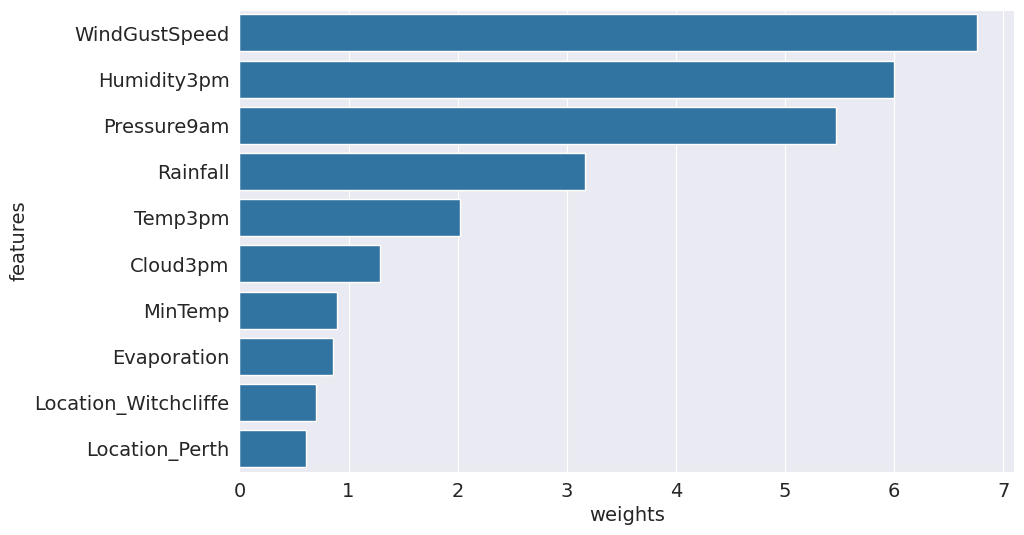

In [ ]:
sns.barplot(data=weight_df.sort_values('weights',ascending=False).head(10),x='weights',y='features')

In [ ]:
x_train=train_inputs[numeric_cols+encoded_cols]
x_val=val_inputs[numeric_cols+encoded_cols]
x_test=test_inputs[numeric_cols+encoded_cols]

In [ ]:
train_preds=model.predict(x_train)


In [ ]:
train_targets

RainTomorrow
0                No
1                No
2                No
3                No
4                No
...             ...
144548           No
144549           No
144550           No
144551           No
144552           No

[97988 rows x 1 columns]

now we compare the matching values in train_preds and train_targets

we count the number of matches and divide that with the total number of days or less using AccuracyScore library

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets,train_preds)

0.8519206433440829

**CONFUSION MATRIX**

the model achives an accuracy of 85.1% on the training set. we can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.
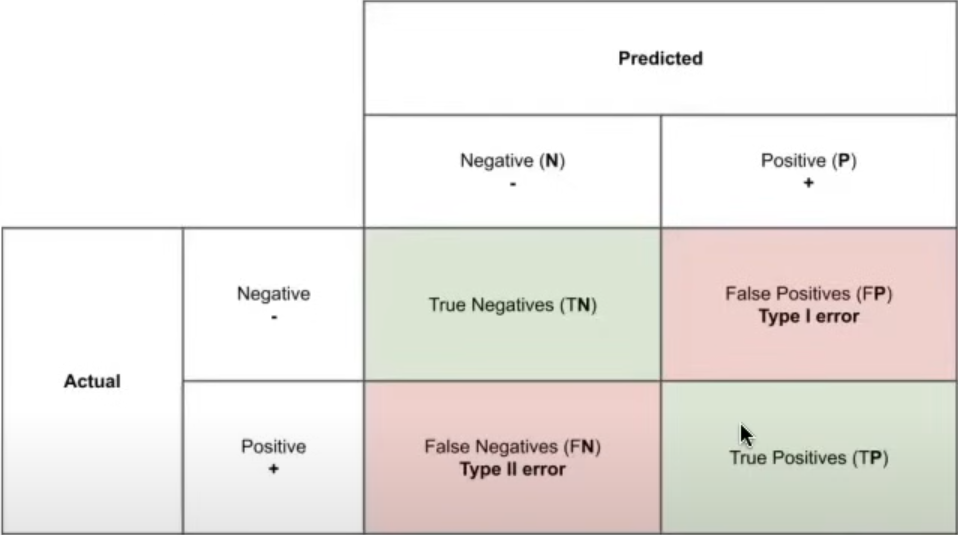

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(train_targets,train_preds,normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [ ]:
def predict_and_plot(inputs,targets,name=''):
  preds=model.predict(inputs)

  accuracy=accuracy_score(targets,preds)
  print('accuracy :{:.2f}%'.format(accuracy*100))

  cf=confusion_matrix(targets,preds,normalize='true')
  plt.figure()
  sns.heatmap(cf,annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrix'.format(name));

  return preds


accuracy :85.19%


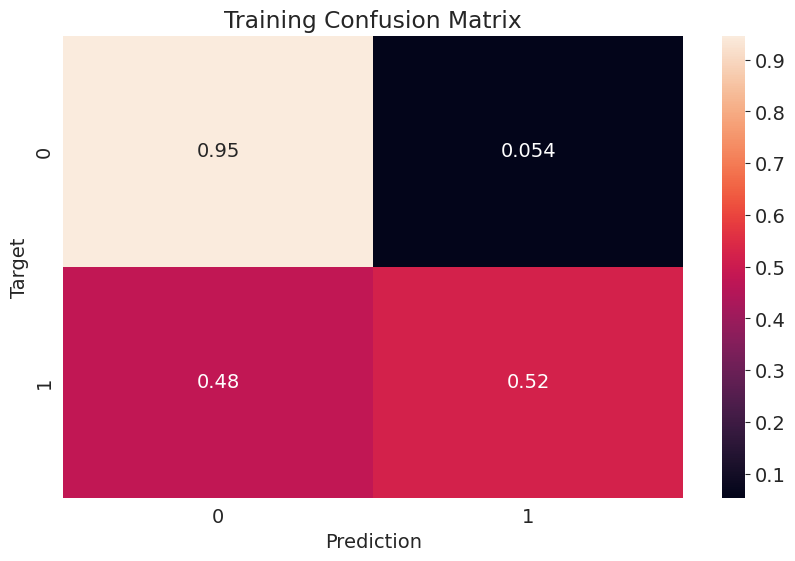

In [ ]:
train_preds=predict_and_plot(x_train,train_targets,'Training')

accuracy :85.40%


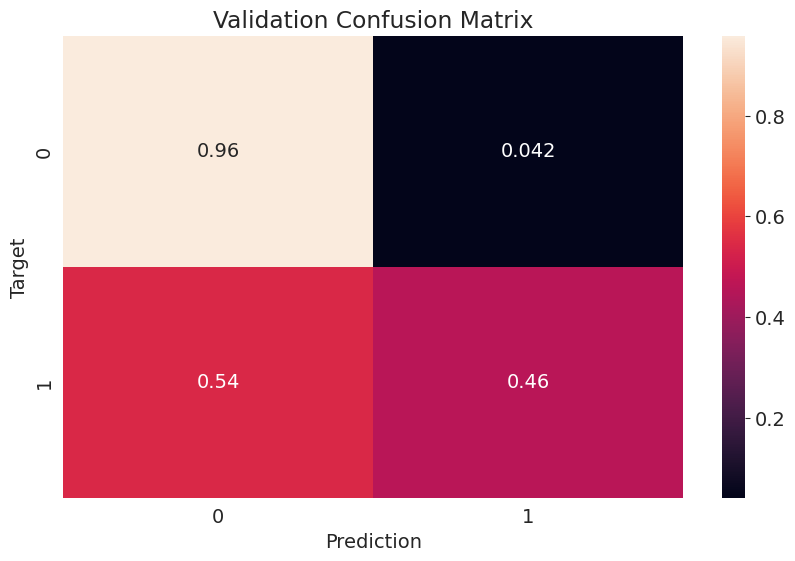

In [ ]:
val_preds=predict_and_plot(x_val,val_targets,'Validation')

accuracy :84.20%


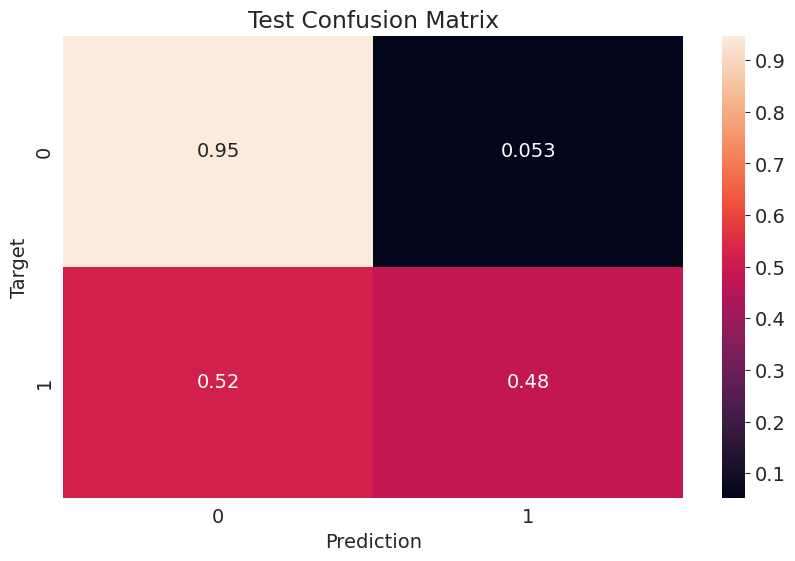

In [ ]:
test_preds=predict_and_plot(x_test,test_targets,'Test')

Create dumb models to check if your preprocessed model is any good fot those model if not try another approach in preprocessing

In [ ]:
def random_guess_model(inputs):
  return np.random.choice(['No','Yes'],len(inputs))



In [ ]:
def all_no_model(inputs):
  return np.full(len(inputs),'No')

In [ ]:
accuracy_score(test_targets,random_guess_model(x_test))

0.5040840140023337

In [ ]:
accuracy_score(train_targets,random_guess_model(x_train))

0.5031228313671062

In [ ]:
accuracy_score(val_targets,random_guess_model(x_val))

0.4954064017789221

In [ ]:
accuracy_score(train_targets,all_no_model(x_train))


0.7775441890843777

In [ ]:
new_input= {
    "Date": "2024-10-25",
    "Location": "Sydney",
    "MinTemp": 14.5,
    "MaxTemp": 28.3,
    "Rainfall": 2.4,
    "Evaporation": 5.6,
    "Sunshine": np.nan,
    "WindGustDir": "NNW",
    "WindGustSpeed": 44.0,
    "WindDir9am": "E",
    "WindDir3pm": "SW",
    "WindSpeed9am": 15.0,
    "WindSpeed3pm": 20.0,
    "Humidity9am": 68.0,
    "Humidity3pm": 55.0,
    "Pressure9am": 1012.3,
    "Pressure3pm": 1010.7,
    "Cloud9am": 4.0,
    "Cloud3pm": 3.0,
    "Temp9am": 22.5,
    "Temp3pm": 27.8,
    "RainToday": "Yes",
}


new_input = {
    "Date": "2024-10-25",
    "Location": "Sydney",
    "MinTemp": 17.2,
    "MaxTemp": 26.4,
    "Rainfall": 0.0,
    "Evaporation": 4.1,
    "Sunshine": np.nan,
    "WindGustDir": "NE",
    "WindGustSpeed": 35.0,
    "WindDir9am": "E",
    "WindDir3pm": "NW",
    "WindSpeed9am": 12.0,
    "WindSpeed3pm": 20.0,
    "Humidity9am": 75.0,
    "Humidity3pm": 60.0,
    "Pressure9am": 1015.0,
    "Pressure3pm": 1013.5,
    "Cloud9am": 2.0,
    "Cloud3pm": 3.0,
    "Temp9am": 20.1,
    "Temp3pm": 25.6,
    "RainToday": "No",
}
new_input = {
    "Date": "2024-10-25",
    "Location": "Canberra",
    "MinTemp": 12.3,
    "MaxTemp": 24.8,
    "Rainfall": 0.5,
    "Evaporation": 3.2,
    "Sunshine": 7.8,
    "WindGustDir": "W",
    "WindGustSpeed": 45.0,  # Increased wind gust speed due to the likelihood of rain tomorrow
    "WindDir9am": "NW",
    "WindDir3pm": "SW",
    "WindSpeed9am": 12.0,
    "WindSpeed3pm": 18.0,
    "Humidity9am": 82.0,
    "Humidity3pm": 70.0,
    "Pressure9am": 1014.0,
    "Pressure3pm": 1011.0,
    "Cloud9am": 5.0,
    "Cloud3pm": 6.0,
    "Temp9am": 16.0,
    "Temp3pm": 22.5,
    "RainToday": "No",
    "RainTomorrow": "Yes"
}




new_input_df=pd.DataFrame([new_input])


new_input_df[numeric_cols]=imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols]=scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols]=encoder.transform(new_input_df[categorical_cols])


x_new_input=new_input_df[numeric_cols + encoded_cols]


<ipython-input-75-5a93b513a015>:85: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-75-5a93b513a015>:85: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-75-5a93b513a015>:85: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-75-5a93b513a015>:85: PerformanceWarning:

In [ ]:
prediction=model.predict(x_new_input)[0]
prediction

'No'

In [ ]:
prob=model.predict_proba(x_new_input)[0]
prob

array([0.58317565, 0.41682435])

In [ ]:
def predict_input(single_input):
  input_df=pd.DataFrame([single_input])
  input_df[numeric_cols]=imputer.transform(input_df[numeric_cols])
  input_df[numeric_cols]=scaler.transform(input_df[numeric_cols])
  input_df[encoded_cols]=encoder.transform(input_df[categorical_cols])
  x_input=input_df[numeric_cols+encoded_cols]
  pred=model.predict(x_input)[0]
  return pred,prob


In [ ]:
new_input = {
    "Date": "2024-10-25",
    "Location": "Canberra",
    "MinTemp": 12.3,
    "MaxTemp": 24.8,
    "Rainfall": 0.5,
    "Evaporation": 3.2,
    "Sunshine": 7.8,
    "WindGustDir": "W",
    "WindGustSpeed": 45.0,  # Increased wind gust speed due to the likelihood of rain tomorrow
    "WindDir9am": "NW",
    "WindDir3pm": "SW",
    "WindSpeed9am": 12.0,
    "WindSpeed3pm": 18.0,
    "Humidity9am": 82.0,
    "Humidity3pm": 70.0,
    "Pressure9am": 1014.0,
    "Pressure3pm": 1011.0,
    "Cloud9am": 5.0,
    "Cloud3pm": 6.0,
    "Temp9am": 16.0,
    "Temp3pm": 22.5,
    "RainToday": "No",
    "RainTomorrow": "Yes"
}

In [ ]:
predict_input(new_input)

<ipython-input-86-3acd2b3c781c>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-86-3acd2b3c781c>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-86-3acd2b3c781c>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-86-3acd2b3c781c>:5: PerformanceWarning:

Da

('No', array([0.58317565, 0.41682435]))